In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
cityData = pd.read_csv(city_data_to_load)
rideData = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
merged_Data = pd.merge(cityData, rideData, on="city")
# Display the data table for preview
merged_Data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [2]:
cityData = merged_Data
del cityData['date']
del cityData['ride_id']


## Bubble Plot of Ride Sharing Data

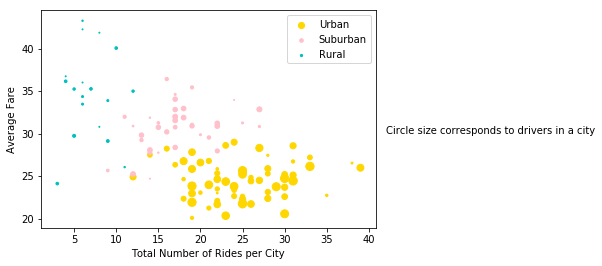

In [3]:
### Obtain the x and y coordinates for each of the three city types
yData = merged_Data.groupby(['city','type', 'driver_count'], as_index=False)['fare'].mean()
xData = merged_Data.groupby(['city','type', 'driver_count'], as_index=False)['fare'].count()

yData.set_index('type')
xData.set_index('type')

# Build the scatter plots for each city types
urbanGraph = plt.scatter(xData.loc[xData["type"] == "Urban", :]['fare'], yData.loc[yData["type"] == "Urban", :]['fare'], yData.loc[yData["type"] == "Urban", :]['driver_count'], color="gold", label='Urban')
suburbanGraph = plt.scatter(xData.loc[xData["type"] == "Suburban", :]['fare'], yData.loc[yData["type"] == "Suburban", :]['fare'], yData.loc[yData["type"] == "Suburban", :]['driver_count'],color="pink", label='Suburban')
ruralGraph = plt.scatter(xData.loc[xData["type"] == "Rural", :]['fare'], yData.loc[yData["type"] == "Rural", :]['fare'], yData.loc[yData["type"] == "Rural", :]['driver_count'],color="c", label='Rural')
# Incorporate the other graph properties
plt.xlabel("Total Number of Rides per City")
plt.ylabel("Average Fare")
# Create a legend
plt.legend(handles=[urbanGraph, suburbanGraph, ruralGraph], loc="best")
# Incorporate a text label regarding circle size
plt.text(42,30,'Circle size corresponds to drivers in a city')
# Save Figure
plt.savefig("../Images/pyber_starter.png")


In [4]:
# Show plot
plt.show()

## Total Fares by City Type

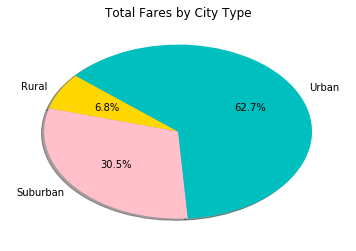

In [5]:
# Calculate Type Percents
typeSum = merged_Data.groupby(['type'])['fare'].sum()
# Build Pie Chart
typeSum.plot(kind='pie',colors=('gold','pink','c'),autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Total Fares by City Type")
plt.ylabel('')
# Save Figure
plt.savefig("../Images/City_Type.png")

In [6]:
# Show Figure
plt.show()

## Total Rides by City Type

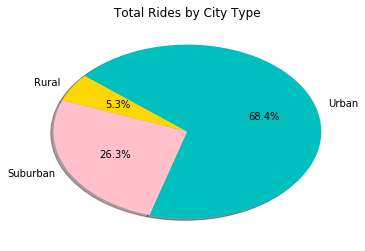

In [7]:
# Calculate Ride Percents
typeCount = merged_Data.groupby(['type'])['fare'].count()
# Build Pie Chart
typeCount.plot(kind='pie',colors=('gold','pink','c'),autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Total Rides by City Type")
plt.ylabel('')
# Save Figure
plt.savefig("../Images/City_Count.png")

In [8]:
# Show Figure
plt.show()

## Total Drivers by City Type

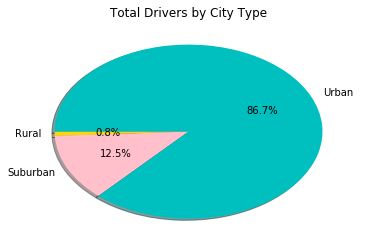

In [9]:
# Calculate Driver Percents
driverCount = merged_Data.groupby(['type'])['driver_count'].sum()
# Build Pie Charts
driverCount.plot(kind='pie',colors=('gold','pink','c'),autopct="%1.1f%%", shadow=True, startangle=180)
plt.title("Total Drivers by City Type")
plt.ylabel('')
# Save Figure
plt.savefig("../Images/Driver_Count.png")

In [10]:
# Show Figure
plt.show()